In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

La fuerza a la que se someterá el oscilador armónico será de la forma
$$F(t)=F_0\cos(\omega t)$$
donde $F_0$ y $ω$ son la amplitud y la frecuencia de la fuerza aplicada.

Si $b$ es es el coeficiente de amortiguamiento, $k$ la constante del resorte y $m$ la masa oscilante, se tiene la ecuación diferencial que describe el movimiento del oscilador:
\begin{equation}
F_0\cos(\omega t)-b\frac{dx}{dt}-kx=m\frac{d^2x}{dt^2}
\end{equation}

In [ ]:
omega,F0,k,m,b=symbols('omega F_0 k m b',positive=True)
t=symbols('t')
x=Function('x')(t)

In [ ]:
ecuacion=Eq(F0*cos(omega*t),m*x.diff(t, 2)+b*x.diff(t)+k*x)
ecuacion

Eq(F_0*cos(omega*t), b*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)))

In [ ]:
solucion=dsolve(ecuacion, x)
solucion

Eq(x(t), C1*exp(t*(-b + sqrt(b**2 - 4*k*m))/(2*m)) + C2*exp(-t*(b + sqrt(b**2 - 4*k*m))/(2*m)) + F_0*b*omega*sin(omega*t)/(b**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) + F_0*k*cos(omega*t)/(b**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) - F_0*m*omega**2*cos(omega*t)/(b**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

Una vez que ya se tiene la solución general, se realizó una función que mostrara gráficamente el comportamiento del oscilador dependiendo del valor de las constantes y las condiciones iniciales.

In [ ]:
def solucionSympy(F,o,B,K,M,x0,v0): #argumentos (en orden) F0, omega, b, k, m, posición inicial, velocidad inicial
  valores={F0:F,omega:o,b:B,k:K,m:M}
  solucion_particular = solucion.subs(valores).rhs #se obtiene una solución para valores de F0, omega, b, k y m constantes (la expresión aún contiene a C1 y C2)
  condiciones_inic = {'x(0)':x0, 'dx/dt(0)':v0}
  constantes=solve((solucion_particular.subs(t,0)-condiciones_inic['x(0)'],solucion_particular.diff(t).subs(t,0)-condiciones_inic['dx/dt(0)'])) #Con base en las condiciones iniciales se encuentran los valores de C1 y C2
  solucion_final=solucion_particular.subs(constantes) #Esta solución es la que cumple con las condiciones iniciales para valores de  F0, omega, b, k y m dados
  return solucion_final#plot(solucion_final,(t,0,20)) #La solución se grafica en un intervalo de 0 a 20 seg

In [ ]:
#Ejemplos
x1=solucionSympy(2,6,0.3,2,1,4,-5)
x2=solucionSympy(4,1,0.3,13,1,4,3)
T=np.linspace(0,20,1000)
fun1=lambdify(t,x1,np) #Se utiliza lamdify para transformar las expersiones simbólicas en funciones lambda para obtener valores numéricos
fun2=lambdify(t,x2,np)

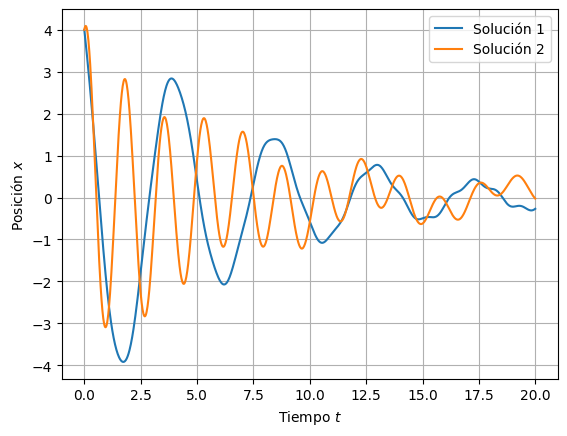

In [ ]:
plt.plot(T,np.real(fun1(T)),label='Solución 1') #Como las soluciones son complejas solo se grafica la parte real
plt.plot(T,np.real(fun2(T)),label='Solución 2')
plt.xlabel('Tiempo $t$')
plt.ylabel('Posición $x$')
plt.grid(True)
plt.legend()

In [ ]:
Sol=np.real(fun1(T))
np.savetxt('datosSympy1.txt',Sol) #Se guardan los datos de la primera solución para hacer la comparación entre sympy y scipy